/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training data features and output:
[ 3.08448642 -1.87655948  1.81561548 -0.08618734 -2.15474615  0.38361395
 -0.54035823 -1.22510618]
[0. 0. 0. 1.]
Training data features and output:
[-2.31871435  1.44335156 -1.19982848  0.63955514  1.81807044 -0.33571507
  0.11645124  0.55843745]
[0. 1. 0. 0.]
Training data features and output:
[ 1.08140436 -0.1762244   0.28882915 -1.55961269  0.92002655 -0.79843905
  1.64549034 -1.30835807]
[0. 0. 0. 1.]
Training data features and output:
[ 3.19468955 -2.03654447  0.39021926 -2.05858449  1.10947028 -2.36972141
  2.55547839 -2.74463759]
[0. 0. 0. 1.]
Training data features and output:
[ 1.50123307 -1.07571468  2.50804888  0.35349917 -4.35769974  0.11960567
 -1.1650881   1.1151211 ]
[0. 0. 1. 0.]
Training data features and output:
[-0.27875337  1.73880595 -1.52790023 -0.26438952  2.11695607  0.55186366
 -2.0614334  -0.75324988]
[0. 0. 1. 0.]
Training data features and output:
[ 2.08969416 -1.76113608 -0.37868144 -0.48678884  2.86610283 -1.52401524
  2.

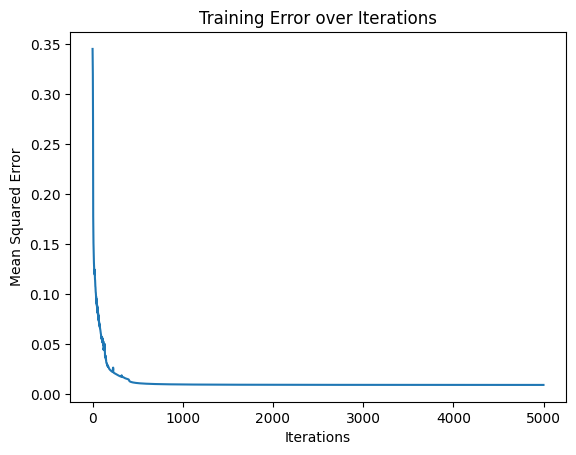

Model output:
[[5.95901205e-05 1.29166723e-05 9.97046504e-01 3.17564747e-03]
 [9.47208499e-03 5.51152744e-03 2.28687450e-06 9.97052544e-01]
 [6.55552981e-06 1.39597988e-02 7.80410579e-02 5.34863889e-04]
 [2.14814519e-01 1.26094541e-01 1.32180409e-04 2.91126829e-01]
 [5.55625851e-05 9.95373510e-06 9.95772688e-01 5.06174048e-03]
 [9.95516815e-01 4.75686377e-04 2.37226717e-04 2.48620483e-03]
 [2.97678614e-06 1.24985276e-02 9.75844898e-01 5.27041367e-06]
 [1.76340581e-03 2.23650782e-02 6.03944629e-06 9.91248861e-01]
 [1.09934642e-02 3.54097608e-09 9.53916702e-01 1.70279877e-03]
 [9.99968758e-01 6.91598436e-06 2.49656466e-02 9.32975792e-05]
 [2.60954315e-04 4.51823710e-03 1.36103469e-07 9.99850710e-01]
 [9.92347457e-01 2.24036236e-03 7.27202917e-04 3.97977855e-04]
 [1.78322651e-05 8.21154567e-07 7.08926557e-03 9.96096894e-01]
 [7.60622343e-04 9.97610224e-01 3.40301771e-04 1.76619467e-03]
 [6.05616549e-04 9.94617907e-01 1.88952854e-04 4.50656357e-03]
 [1.51707007e-05 1.03907091e-02 9.9896693

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Dataset generation
n_samples = 100
n_features = 8
n_classes = 4

X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=5,
    n_classes=n_classes,
    random_state=42
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

# One-hot encode the training output
onehot_encoder = OneHotEncoder(sparse=False)
y_train = y_train.reshape(len(y_train), 1)
y_train_encoded = onehot_encoder.fit_transform(y_train)

# Print training data samples for verification
for i in range(10):
    print('Training data features and output:')
    print(X_train[i])
    print(y_train_encoded[i])

class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 8
        hiddenLayerNeurons = 10
        outLayerNeurons = 4

        self.learning_rate = 0.2
        # Initialize weight matrices for the hidden and output layers
        self.W_HI_1 = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)  # Weights from input to first hidden layer
        self.W_HI_2 = np.random.randn(hiddenLayerNeurons, hiddenLayerNeurons)  # Weights from first hidden to second hidden layer
        self.W_HO = np.random.randn(hiddenLayerNeurons, outLayerNeurons)  # Weights from second hidden layer to output layer

    def sigmoid(self, x, der=False):
        if der:
            return x * (1-x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        self.hidden_input_1 = np.dot(X, self.W_HI_1)
        self.hidden_output_1 = self.sigmoid(self.hidden_input_1)

        self.hidden_input_2 = np.dot(self.hidden_output_1, self.W_HI_2)
        self.hidden_output_2 = self.sigmoid(self.hidden_input_2)

        self.output_input = np.dot(self.hidden_output_2, self.W_HO)
        self.output = self.sigmoid(self.output_input)  # Changed to sigmoid

        return self.output

    def backPropagation(self, X, Y, output):
        output_error = Y - output  # Output error
        output_delta = output_error * self.sigmoid(output, der=True)  # Derivative of sigmoid

        hidden_error_2 = output_delta.dot(self.W_HO.T)
        hidden_delta_2 = hidden_error_2 * self.sigmoid(self.hidden_output_2, der=True)

        hidden_error_1 = hidden_delta_2.dot(self.W_HI_2.T)
        hidden_delta_1 = hidden_error_1 * self.sigmoid(self.hidden_output_1, der=True)

        self.W_HO += self.hidden_output_2.T.dot(output_delta) * self.learning_rate
        self.W_HI_2 += self.hidden_output_1.T.dot(hidden_delta_2) * self.learning_rate
        self.W_HI_1 += X.T.dot(hidden_delta_1) * self.learning_rate

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

# Create the neural network
NN = NeuralNetwork()

# Train the model for 5000 iterations and plot the loss
err = []
for i in range(5000):
    NN.train(X_train, y_train_encoded)
    err.append(np.mean(np.square(y_train_encoded - NN.feedForward(X_train))))

print("Error on training data:")
plt.plot(err)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Training Error over Iterations')
plt.show()

# Evaluate the trained model on test data
y_pred = NN.feedForward(X_test)
print("Model output:")
print(y_pred)

# One-hot encode the predictions
new_y_pred = np.zeros(y_pred.shape)  # One-hot encoded predictions
max_y_pred = np.argmax(y_pred, axis=1)
for i in range(len(y_pred)):
    new_y_pred[i][max_y_pred[i]] = 1

print("One-hot encoded output:")
print(new_y_pred)

# Obtain predicted output values
y_pred = new_y_pred.argmax(axis=1)
print("Predicted values: ", y_pred)

# Print true output values
y_test = y_test.flatten()
print("Actual values: ", y_test)

# Calculate accuracy on test data
def accuracy(y_pred, y_true):
    acc = y_pred == y_true
    print("Predictions: ", acc)
    return acc.mean()

print("Accuracy: ", accuracy(y_pred, y_test))

# Print confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n", confusion_matrix)
